In [1632]:
import numpy as np
import os
import matplotlib.pyplot as plt
from importlib import reload
import AHM
reload(AHM)
#n=0
date = '060825'

In [1633]:
k = np.linspace(0, 2*np.pi, 40)

In [1634]:
n

110

In [1635]:
n+=1
da= 3
db=0
dc=-da
na=0
nb=0
nc=na
mM = AHM.Model(Del0A = da, Del0B=db, Del0C= dc, nA=na, nB=nb, nC=nc, U=7, UB=0, muB=0, mu=0, t=1, inhomp=True, inhomi=True)
alpha=0.8
vals = mM.Deltra(k, Nmax=350, Nmin=150, alpha=alpha)



0 1


c:\Users\atsch\Desktop\MasterVorlesungen\Sommer25\Lieb-Lattice\AHM.py:145: ComplexWarning: Casting complex values to real discards the imaginary part
  d=0


1 0.0
2 0.010047763736267623
3 0.010505265438450897
4 0.008910988425373403
5 0.007556295688848378
[[ 0.        +0.00000000e+00j -2.        +0.00000000e+00j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.        +0.00000000e+00j  2.92127766-2.45232113e-09j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j]
 [-2.        +0.00000000e+00j  0.        +0.00000000e+00j
  -2.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j]
 [ 0.        +0.00000000e+00j -2.        +0.00000000e+00j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.        +0.00000000e+00j 

In [1636]:
dels = vals[0]
nus = vals[2]

In [1637]:
vals[1]

array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 0.00000000e+00, 1.00477637e-02, 1.05052654e-02,
       8.91098843e-03, 7.55629569e-03, 7.39760691e-03, 6.00923247e-03,
       5.11043842e-03, 4.39451997e-03, 4.06215239e-03, 3.45681972e-03,
       3.06848158e-03, 2.37138544e-03, 2.46915325e-03, 2.31868924e-03,
       1.76211899e-03, 1.86781097e-03, 1.10176382e-03, 1.05099752e-03,
       1.12276742e-03, 1.51828122e-03, 1.14268886e-03, 1.16745371e-03,
       5.41019476e-04, 5.42700604e-04, 7.38572305e-04, 3.44548130e-04,
       5.80710587e-04, 7.30304459e-04, 4.00627806e-04, 6.39954153e-04,
       1.51300552e-04, 1.19708798e-04, 7.02055029e-05, 3.39639323e-04,
       9.71298696e-04, 2.02852158e-04, 2.42195225e-04, 2.96167372e-04,
       1.70174734e-04, 4.52262164e-04, 3.64831639e-04, 5.88547001e-04,
       2.85345300e-04, 1.60522967e-04, 6.25948867e-05, 1.48987583e-04,
       2.47253629e-04, 1.29571789e-04, 1.80131246e-04, 1.01463007e-04,
      

In [1638]:
dels[:,-5:]

array([[ 2.9115797 +7.86122404e-18j,  2.91112205-8.82946428e-18j,
         2.91091615+7.77984408e-17j,  2.91127745-1.94277225e-17j,
         2.91128236-4.96425137e-16j],
       [ 0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
         0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
         0.        +0.00000000e+00j],
       [-2.62935128+9.05968970e-18j, -2.63182975-8.98420703e-18j,
        -2.63218008+8.62582859e-17j, -2.63196588-2.02355084e-17j,
        -2.63143562-5.48039422e-16j]])

In [1639]:
s1 = [np.sum(nus[:,i]) for i in range(np.shape(nus)[1])]


In [1640]:
fol = f'calc{date}_{n}'
newpath = r"C:\Users\atsch\Desktop\MasterVorlesungen\Sommer25\Lieb-Lattice\Pictures\scf\'"+fol

if not os.path.exists(newpath):
    os.makedirs(newpath)

filename = "parameters.txt"

text = os.path.join(newpath, filename)

with open(text, "w") as file:
    file.write(f"mM = AHM.Model(Del0A, Del0B, Del0C= {dels[:,0]}, nA, nB, nC={nus[:,0]}, U={mM.U}, UB={mM.UB}, mu={mM.mu}, muB={mM.muB}, t={mM.t}, inhomp={mM.inhomp}, inhomi={mM.inhomi})\n alpha={alpha}\n dels: {dels}\nnus: {nus}")
    file.close

c:\Users\atsch\anaconda3\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\atsch\anaconda3\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


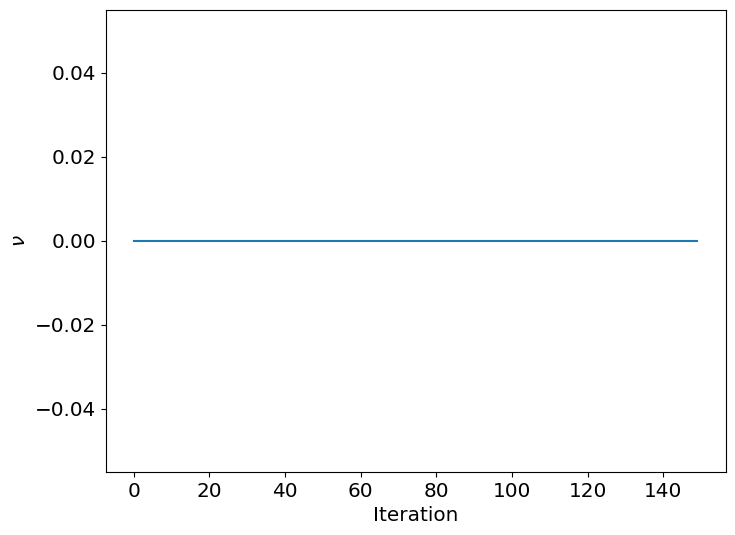

In [1641]:
plt.figure(figsize=(8,6))
plt.xlabel('Iteration', size='x-large')
plt.ylabel(r'$\nu$', size='x-large')
plt.xticks(size='x-large')
plt.yticks(size='x-large')
#plt.ylim(0,0.35)

plt.plot(np.arange(len(s1)), s1, label = r'no hopping')


#plt.legend()
plt.savefig(newpath+"//nu.png")
plt.show()

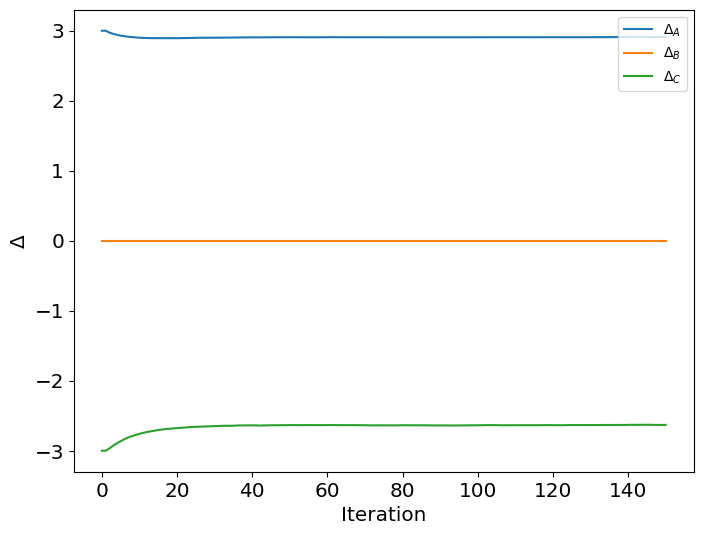

In [1642]:
plt.figure(figsize=(8,6))
plt.xlabel('Iteration', size='x-large')
plt.ylabel(r'$\Delta$', size='x-large')
plt.xticks(size='x-large')
plt.yticks(size='x-large')
#plt.ylim(0,0.35)

plt.plot(np.arange(len(dels[0])), dels[0], label = r'$\Delta_A$')
plt.plot(np.arange(len(dels[0])), dels[1], label = r'$\Delta_B$')
plt.plot(np.arange(len(dels[0])), dels[2], label = r'$\Delta_C$')


plt.legend()
plt.savefig(newpath+"//dels.png")

plt.show()

In [1643]:
da, db, dc = dels[:,-1]
na, nb, nc = nus[:,-1]
#mM = AHM.Model(Del0A = da, Del0B=db, Del0C= dc, nA=na, nB=nb, nC=nc,mu=0, U=3, t=1, inhomp=False, inhomi=True)
H = mM.HBdG()
k = np.linspace(0, 2*np.pi, 100)

k1 = np.ones(100)
k0 = np.zeros(100)
path = np.concatenate((k, k, k*np.sqrt(2)))
kx = np.concatenate((k,np.pi*2*k1, k[::-1]))
ky = np.concatenate((k0, k, k[::-1]))

p = [i for i in range(np.shape(path)[0])]
np.shape(p)
energies = mM.solvHam(kx, ky)

np.shape(energies)
emax = np.amax(energies)
emax = emax+0.1*emax

In [1644]:
energies.T

array([[-4.0654939 , -4.0654939 , -3.85634653, ...,  3.85634653,
         4.0654939 ,  4.0654939 ],
       [-4.06464143, -4.06464143, -3.85618802, ...,  3.85618802,
         4.06464143,  4.06464143],
       [-4.06208546, -4.06208546, -3.85571327, ...,  3.85571327,
         4.06208546,  4.06208546],
       ...,
       [-4.06149961, -4.06149961, -3.85221091, ...,  3.85221091,
         4.06149961,  4.06149961],
       [-4.06449469, -4.06449469, -3.855312  , ...,  3.855312  ,
         4.06449469,  4.06449469],
       [-4.0654939 , -4.0654939 , -3.85634653, ...,  3.85634653,
         4.0654939 ,  4.0654939 ]])

In [1645]:
np.savetxt(newpath +"//dels.txt", dels, delimiter=",")
np.savetxt(newpath +"//nus.txt", nus, delimiter=",")
np.savetxt(newpath +"//energies.txt", energies, delimiter=",")

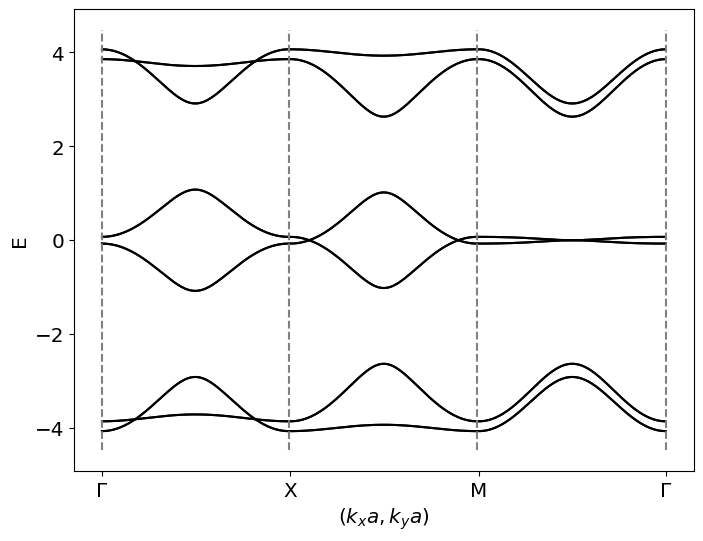

In [1646]:
plt.figure(figsize=(8,6))
plt.xlabel("$(k_x a,k_y a)$", size='x-large')
plt.ylabel("E", size='x-large')
plt.yticks(size='x-large')
plt.xticks(ticks= [0, 100, 200, 299], labels=[r"$\Gamma$",r"X",r"M", r"$\Gamma$"], size='x-large')
#plt.ylim((-0.5, 0.5))

for i in energies:
    plt.plot(p, i, color='black')
#for i in energies2:
#    plt.plot(p, i, color='green', linestyle='dashdot')
#plt.plot(p, energies4[0], color='black', label=r'$\Delta_0=0.5$')
#plt.plot(p, energies2[0], color='green', linestyle='dashdot', label=r'$\Delta_0=1$')

plt.vlines([0, 99, 199, 299], [-emax, -emax, -emax, -emax], [emax, emax, emax, emax], colors= 'grey', linestyles='--')
#plt.vlines(250, -2, 2)
#plt.legend(fontsize='x-large')
#plt.savefig("Pictures/ESCpath.png")
plt.savefig(newpath+"//bands.png")

plt.show()